# **Markov clustering algorithm: Tuning the hyperparameters**

**MCL hyperparameters:**
* Inflation
* Expansion

In [2]:
import os
import sys

src_dir = os.path.abspath('../src')
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from clusTCR.clusTCR import Clustering, Metrics
from clusTCR.datasets import vdj_cdr3, vdj_epitopes

In [4]:
# plot styling
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.)

In [10]:
# Data
cdr3 = vdj_cdr3()
epitopes = vdj_epitopes()

mcl = Clustering(cdr3, method='mcl')

In [17]:
# Generate list of hyperparameter pairs to test
params = []
param_1 = [1.2, 1.3, 1.4, 1.5] 
param_2 = np.round(np.arange(2,10,1),0)
for i in param_1:
    for j in param_2:
        params.append([i, j])
        
# Scan hyperparameter space
res = []
for pair in params:
    clusters = mcl.get_clusters(mcl_params=pair)
    metrics = Metrics(clusters, epitopes, name='mcl')
    summ = metrics.summary()
    summ['inflation'] = [pair[0]] * len(summ)
    summ['expansion'] = [pair[1]] * len(summ)
    res.append(summ)
    
# Write output to file
res = pd.concat(res)
res.to_csv('../results/mcl_hyperparameters.tsv', sep='\t', index=False)

[1.2, 2]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.2, 3]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.2, 4]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.2, 5]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.2, 6]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.2, 7]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.2, 8]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.2, 9]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.3, 2]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.3, 3]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.3, 4]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.3, 5]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.3, 6]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.3, 7]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.3, 8]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.3, 9]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.4, 2]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.4, 3]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.4, 4]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.4, 5]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.4, 6]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.4, 7]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.4, 8]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.4, 9]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.5, 2]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.5, 3]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.5, 4]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.5, 5]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.5, 6]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.5, 7]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.5, 8]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


[1.5, 9]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


## Plot results

In [10]:
data = pd.read_csv('../results/mcl_hyperparameters.tsv', sep='\t')

def plot_hyperparameters_metric(data, metric, title=None):
    
    metric_data = data[data['metrics']==metric]
    inflation = metric_data.inflation.unique()
    expansion = metric_data.expansion.unique()
    values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="actual"))
    
    fig, ax = plt.subplots(figsize=(10,6))
    im = ax.imshow(values, cmap='viridis')
    
    ax.set_xticks(np.arange(len(expansion)))
    ax.set_yticks(np.arange(len(inflation)))
    ax.set_xticklabels(expansion)
    ax.set_yticklabels(inflation)
    ax.set_xlabel('Expansion', fontsize=18)
    ax.set_ylabel('Inflation', fontsize=18)
    
    for i in range(len(inflation)):
        for j in range(len(expansion)):
            text = ax.text(j, i, np.round(values[i, j], 2), ha="center", va="center", color="w")
    
    ax.set_title("MCL hyperparameters - {}".format(metric), fontsize=26)
    fig.tight_layout()
    fig.savefig("../results/figures/mcl_{}.eps".format(metric), format="eps")
    
    plt.show()

### PURITY

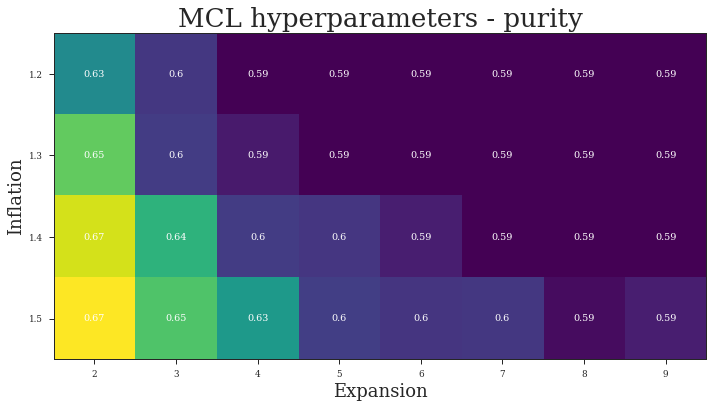

In [11]:
plot_hyperparameters_metric(data, 'purity')

### PURITY_90

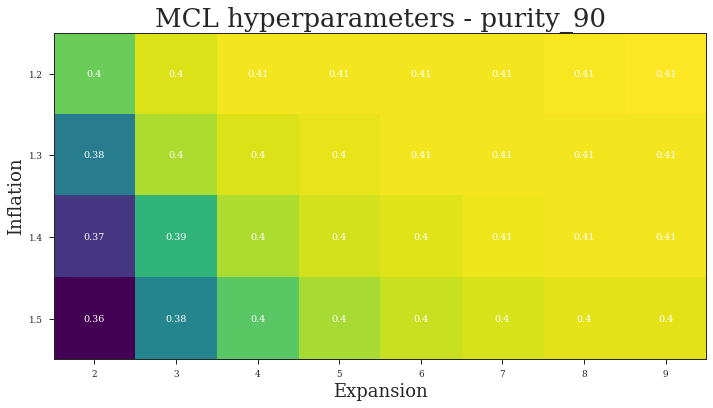

In [12]:
plot_hyperparameters_metric(data, 'purity_90')

### CONSISTENCY

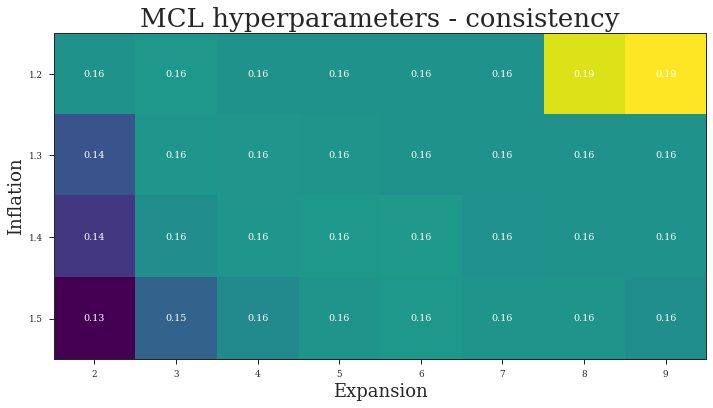

In [13]:
plot_hyperparameters_metric(data, 'consistency')